In [1]:
import numpy as np
from ES import ES

# Zadanie 1.
a) Zaimplementuj omawiane na wykładzie strategie ewolucyjne ES(μ + λ) i ES(μ, λ).
Wskazówka: Algorytmy można zaimplementować w dowolnym języku programowania, ale ze względu na wygodę i wydajność obliczeń (głównie związanych z operacjami wektorowo-macierzowymi i losowaniem danych z rozkładu normalnego) radziłbym używać środowisk dedykowanych do obliczeń wektorowo- macierzowych, m.in. Matlab, Octave lub Python z biblioteką Numpy.

b) Zapoznaj się z popularnymi benchmarkami dla optymalizacji globalnej (http://www-optima.amp.i.kyoto-u.ac.jp/member/student/hedar/Hedar_files/TestGO.htm), zarówno problemami optymalizacji bez ograniczeń jak i z ograniczeniami. Wybierz 5 benchmarków bez ograniczeń i użyj zaimplementowanych algorytmów do ich rozwiązywania (wśród wybranych benchmarków powinna znaleźć się co najmniej jedna z następujących funkcji: Griewank Function, Rastrigin Function, Schwefel Function). Dokładnie przeanalizuj działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.

Wskazówka: Interesują nas wysokowymiarowe przestrzenie poszukiwań, tzn. funkcja celu powinna mieć wiele zmiennych. "Wiele” znaczy tutaj od kilkudziesięciu do kilkuset. Dla mniejszych wymiarów problem często staje się zbyt trywialny i małointeresujący.

#### Used benchmarks:
- Sum squares
- Beale function
- Rosenbrock function
- Rastrigin function
- Griewank function

In [29]:
def test(F, dims, domain, replace_method, parent_choice, glob_min, max_iters=1000):
    
    for d in dims:
        lr = 0.01
        tau0, tau = lr/np.sqrt(2 * np.sqrt(d)), lr/np.sqrt(2*d)
        
        es = ES(domain=domain, dims=d, population_size=1000, offspring_size=1000, 
        parent_choice_method=parent_choice, replacement_method=replace_method, tau=tau, 
        tau0=tau0, cost_func=F, max_iters=max_iters)

        es.run(verbose=False, with_tqdm=True)
        es.history(glob_min, with_plot=True, with_text=True, title=f'{d} dimensions')

### Sum squares function
##### $f(x) = \sum_{i=1}^n{ix_i^2}$

In [3]:
def sum_squares(population):
    return np.array(list(map(lambda ind: ind[0]**2 * np.arange(1, len(ind[0])+1), 
                             population))).sum(axis=1)

In [4]:
dims = [10, 50, 100, 200]

#### ES(mu, lambda) with random parent selection

100%|██████████| 1000/1000 [01:30<00:00, 11.02it/s]


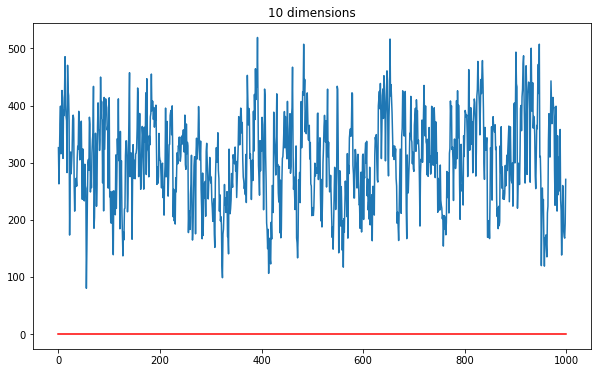


Best cost function: 80.01596 at iter: 55


In [5]:
test(sum_squares, [10], (-10, 10), 'lambda', 'random', 0)

#### ES(mu + lambda) with random parent selection

100%|██████████| 1000/1000 [01:15<00:00, 13.32it/s]


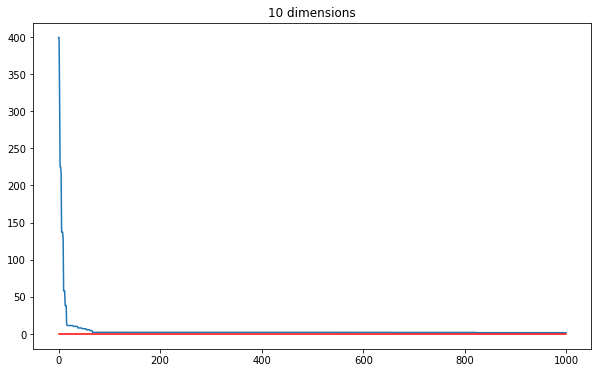

  0%|          | 1/1000 [00:00<03:10,  5.25it/s]


Best cost function: 1.75094 at iter: 823


100%|██████████| 1000/1000 [01:16<00:00, 13.03it/s]


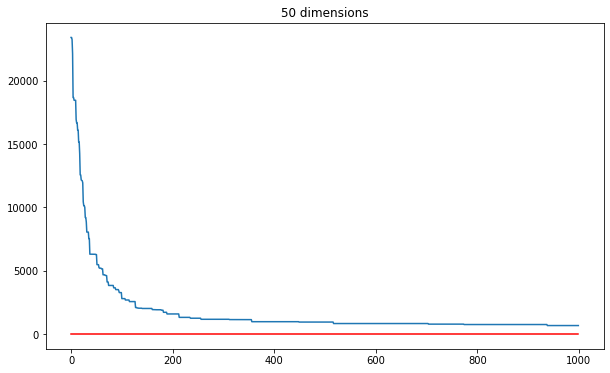

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 665.67344 at iter: 938


100%|██████████| 1000/1000 [01:33<00:00, 10.74it/s]


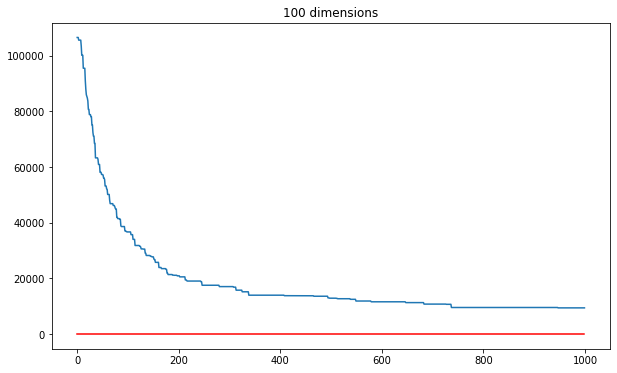

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 9381.17914 at iter: 947


100%|██████████| 1000/1000 [02:38<00:00,  6.32it/s]


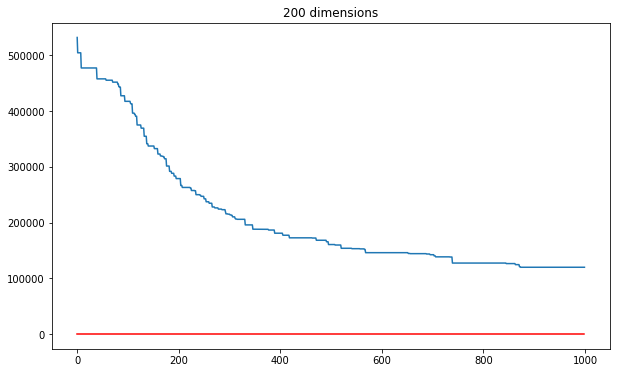


Best cost function: 119757.1595 at iter: 873


In [6]:
test(sum_squares, dims, (-10, 10), 'mulambda', 'random', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:12<00:00, 13.78it/s]


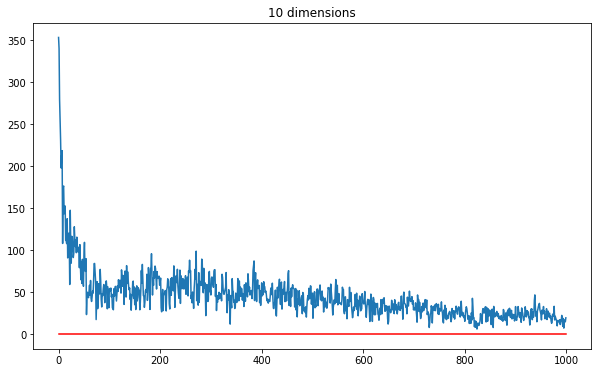

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 5.88519 at iter: 824


100%|██████████| 1000/1000 [01:46<00:00,  9.36it/s]


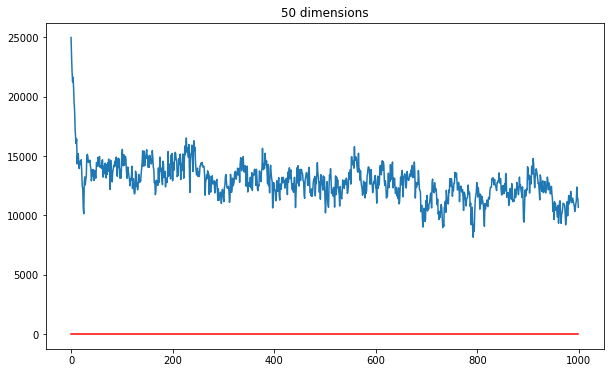

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 8154.22939 at iter: 792


100%|██████████| 1000/1000 [02:53<00:00,  5.77it/s]


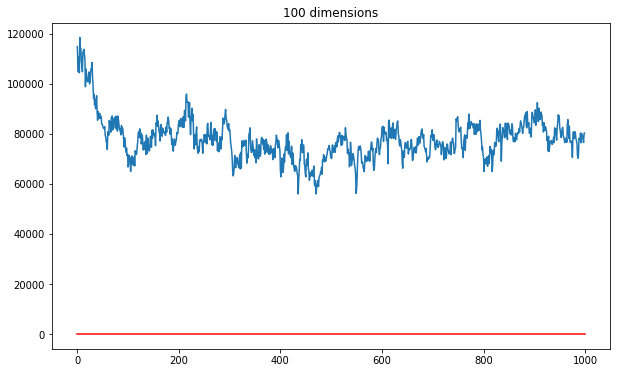

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 55977.24212 at iter: 470


100%|██████████| 1000/1000 [04:04<00:00,  4.09it/s]


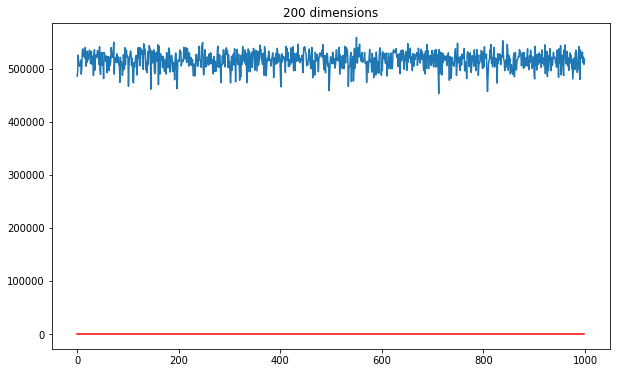


Best cost function: 452735.01014 at iter: 712


In [7]:
test(sum_squares, dims, (-10, 10), 'lambda', 'roulette', 0)

#### ES(mu + lambda) with roulette method

100%|██████████| 1000/1000 [01:12<00:00, 13.85it/s]


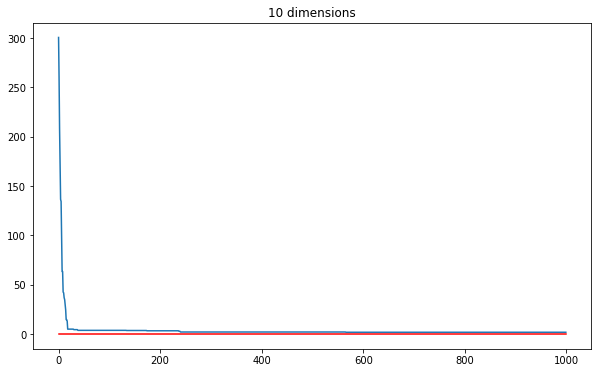

  0%|          | 1/1000 [00:00<03:07,  5.34it/s]


Best cost function: 1.73984 at iter: 566


100%|██████████| 1000/1000 [01:17<00:00, 12.94it/s]


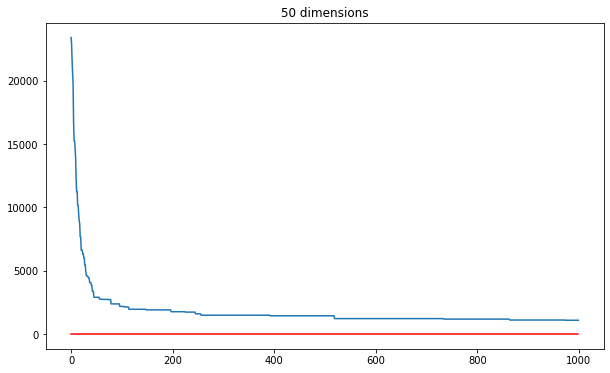

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1083.28055 at iter: 973


100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


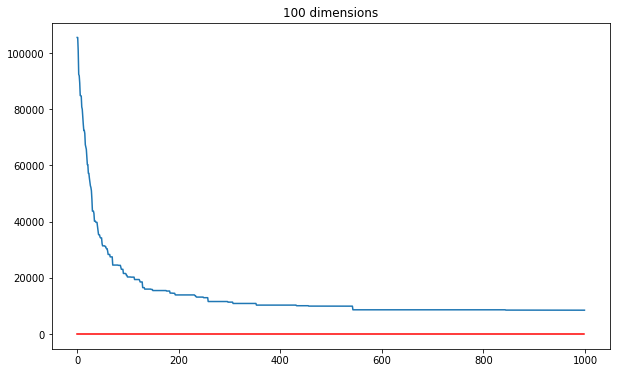

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 8465.37367 at iter: 894


100%|██████████| 1000/1000 [02:16<00:00,  7.34it/s]


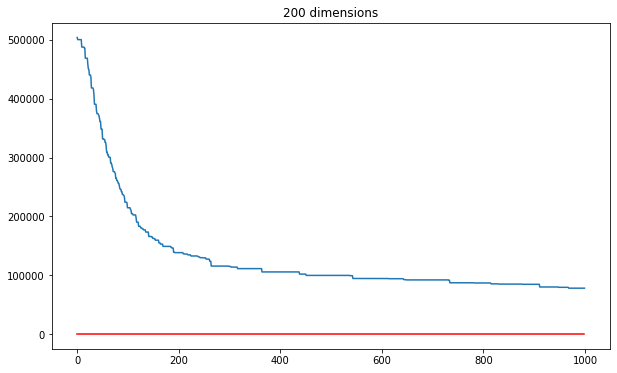


Best cost function: 77885.44786 at iter: 968


In [8]:
test(sum_squares, dims, (-10, 10), 'mulambda', 'roulette', 0)

### Beale Function
##### $f(x) = (1.5 - x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2$

In [9]:
def beale(population):
    return np.array([(1.5 - ind[0][0] + ind[0][0]*ind[0][1])**2 + \
                     (2.25 - ind[0][0] + ind[0][0]*ind[0][1]**2)**2 + \
                     (2.625 - ind[0][0] + ind[0][0]*ind[0][1]**3)**2
                     for ind in population])

#### ES(mu, lambda) with random parent selection

100%|██████████| 1000/1000 [01:16<00:00, 13.02it/s]


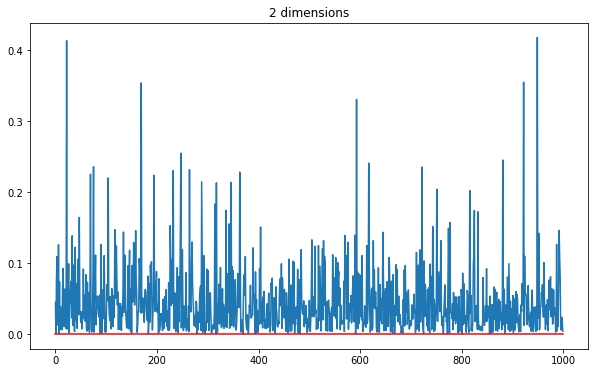


Best cost function: 0.0 at iter: 591


In [10]:
test(beale, [2], (-4.5, 4.5), 'lambda', 'random', 0)

#### ES(mu + lambda) with random parent selection

100%|██████████| 1000/1000 [01:18<00:00, 12.81it/s]


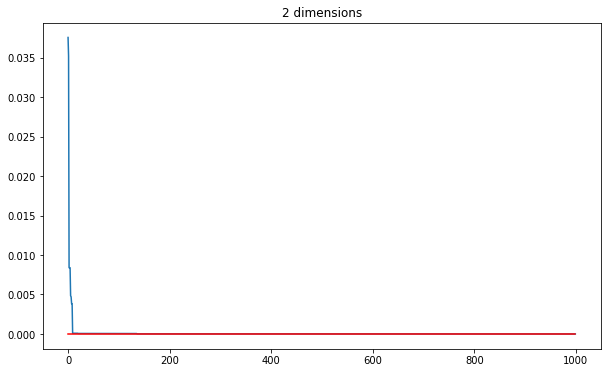


Best cost function: 0.0 at iter: 271


In [11]:
test(beale, [2], (-4.5, 4.5), 'mulambda', 'random', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:17<00:00, 12.89it/s]


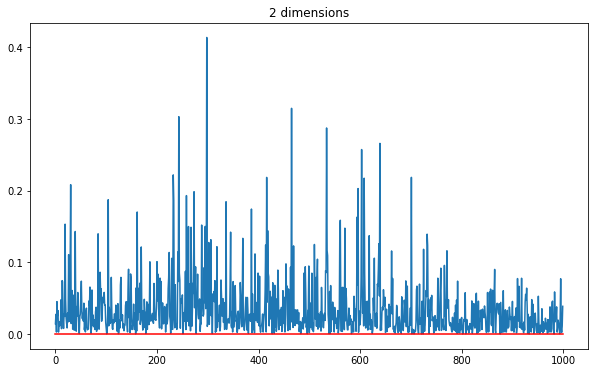


Best cost function: 1e-05 at iter: 724


In [12]:
test(beale, [2], (-4.5, 4.5), 'lambda', 'roulette', 0)

#### ES(mu + lambda) with roulette method

100%|██████████| 1000/1000 [01:14<00:00, 13.47it/s]


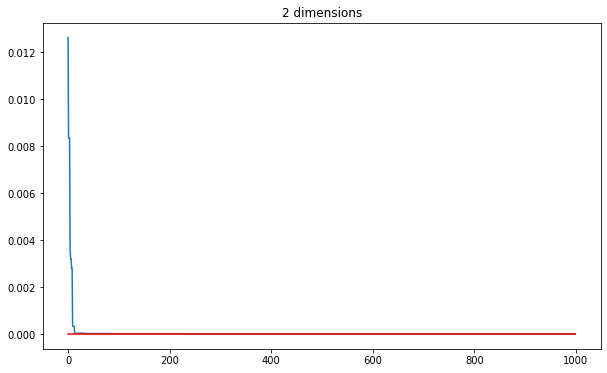


Best cost function: 0.0 at iter: 769


In [13]:
test(beale, [2], (-4.5, 4.5), 'mulambda', 'roulette', 0)

### Rosenbrock Function
##### $f(x) = \sum_{i=1}^{N-1}[100 * (x_{i}^2 - x_{i+1})^2 + (1 - x_i)^2]$

In [14]:
def rosenbrock(population):
    return np.array([(100*(ind[:-1]**2 - ind[1:])**2 + (ind[:-1] - 1)**2).sum() 
                     for ind in population])

#### ES(mu, lambda) with random parent selection

100%|██████████| 1000/1000 [01:32<00:00, 10.87it/s]


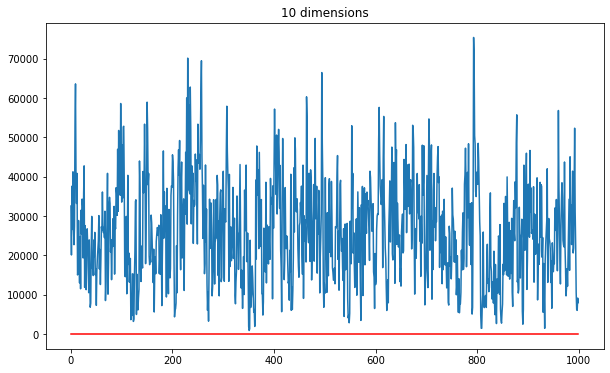


Best cost function: 879.39679 at iter: 351


In [15]:
test(rosenbrock, [10], (-5, 10), 'lambda', 'random', 0)

#### ES(mu + lambda) with random parent selection

100%|██████████| 1000/1000 [01:16<00:00, 13.04it/s]


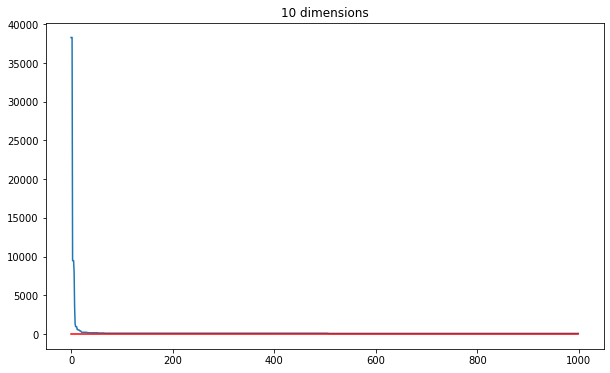

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 68.52123 at iter: 587


100%|██████████| 1000/1000 [01:26<00:00, 11.62it/s]


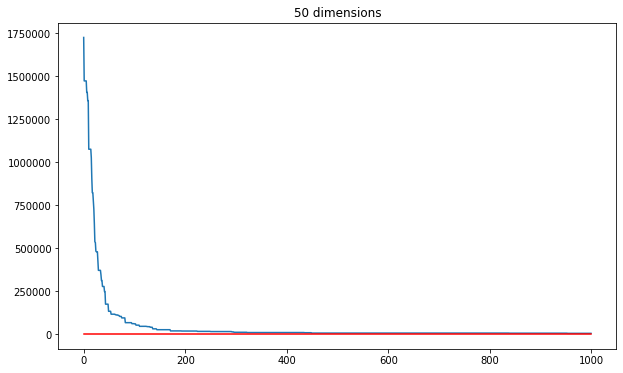

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 3671.40419 at iter: 953


100%|██████████| 1000/1000 [02:01<00:00,  8.21it/s]


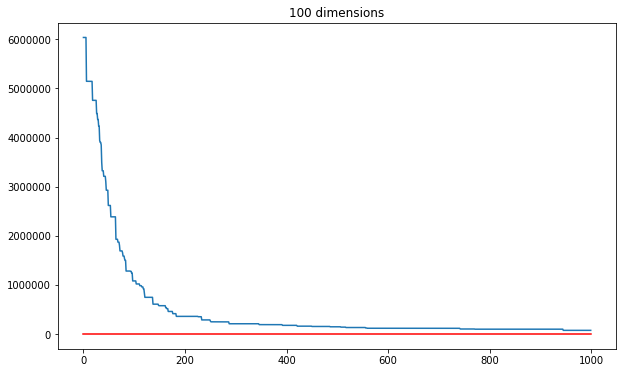

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 73735.73535 at iter: 945


100%|██████████| 1000/1000 [04:11<00:00,  3.98it/s]


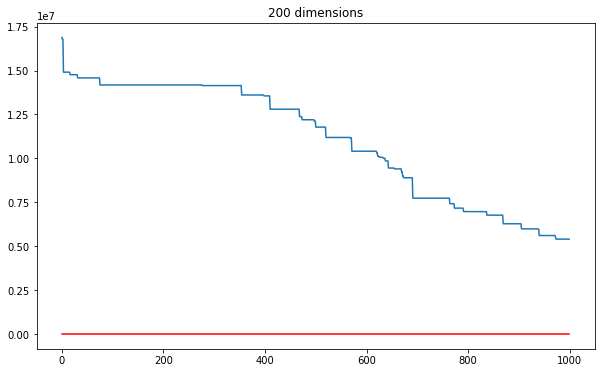


Best cost function: 5401040.21387 at iter: 973


In [16]:
test(rosenbrock, dims, (-5, 10), 'mulambda', 'random', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:31<00:00, 10.95it/s]


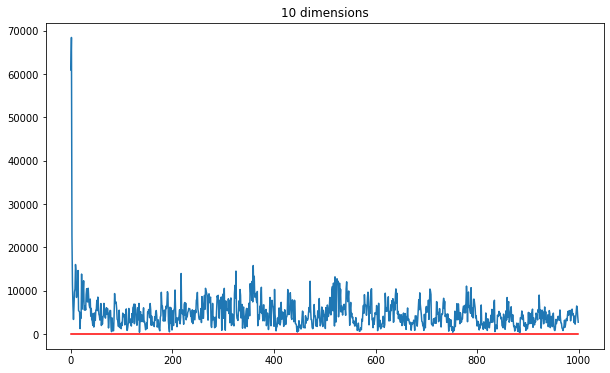

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 317.79869 at iter: 884


100%|██████████| 1000/1000 [02:44<00:00,  6.08it/s]


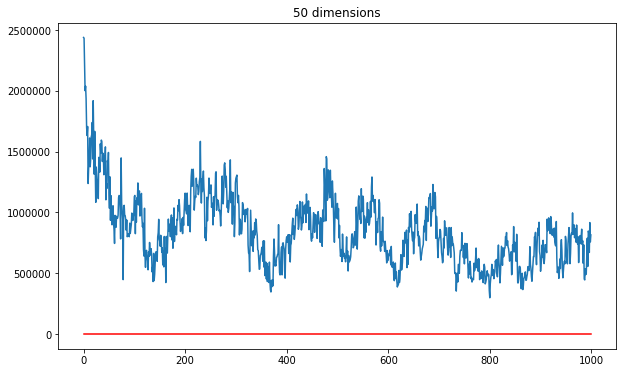

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 297729.72984 at iter: 800


100%|██████████| 1000/1000 [04:24<00:00,  3.78it/s]


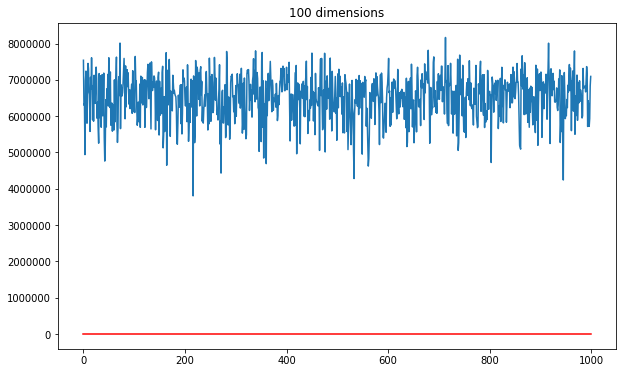

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 3804561.60851 at iter: 216


100%|██████████| 1000/1000 [04:59<00:00,  3.33it/s]


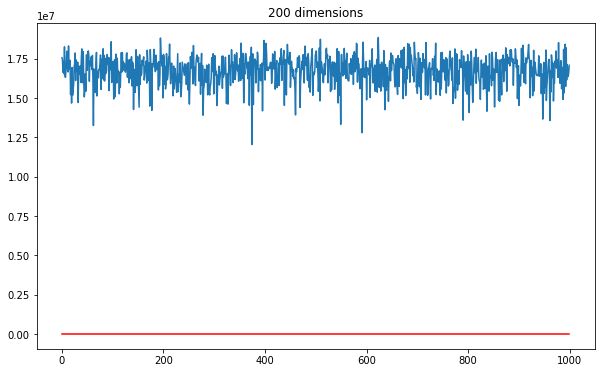


Best cost function: 12042373.85567 at iter: 374


In [17]:
test(rosenbrock, dims, (-5, 10), 'lambda', 'roulette', 0)

#### ES(mu + lambda) with roulette method

100%|██████████| 1000/1000 [01:25<00:00, 11.66it/s]


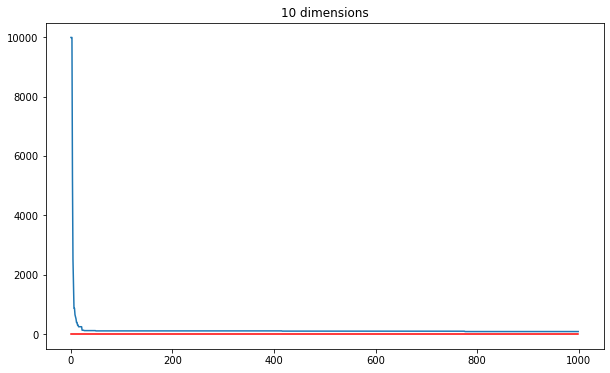

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 81.7233 at iter: 776


100%|██████████| 1000/1000 [01:28<00:00, 11.29it/s]


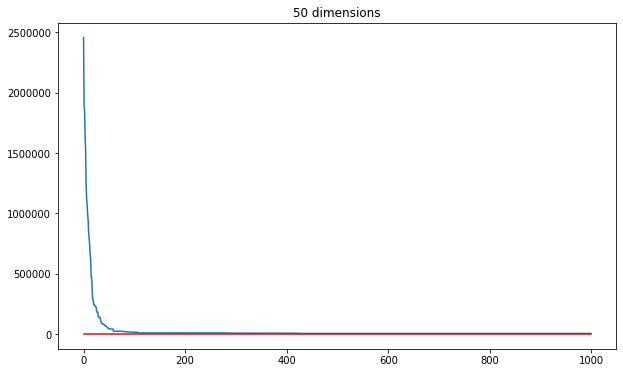

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 4515.79137 at iter: 424


100%|██████████| 1000/1000 [02:17<00:00,  7.29it/s]


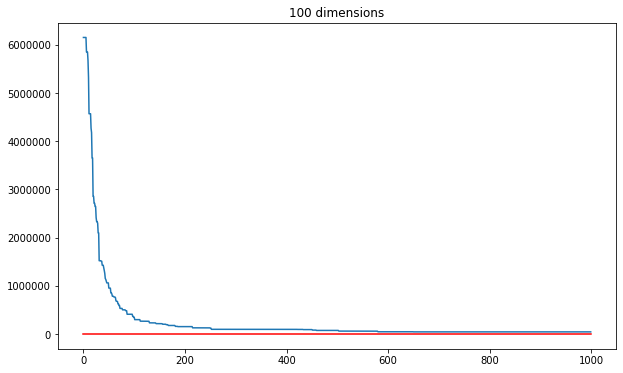

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 43481.92486 at iter: 650


100%|██████████| 1000/1000 [04:07<00:00,  4.04it/s]


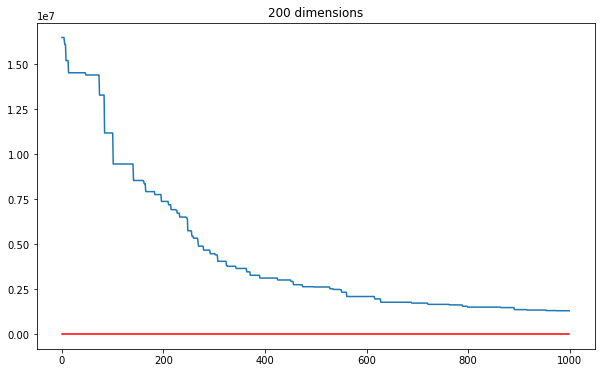


Best cost function: 1291252.30524 at iter: 998


In [18]:
test(rosenbrock, dims, (-5, 10), 'mulambda', 'roulette', 0)

### Rastrigin Function
##### $f(x) = 10*N + \sum_{i=1}^N[{x_i^2 - 10*\cos(2 \pi * x_i)}]$

In [19]:
def rastrigin(population):
    dims = population.shape[-1]
    return 10*dims + np.array([(ind[0]**2 - 10 * np.cos(2*np.pi * ind[0])).sum() 
                               for ind in population])

#### ES(mu, lambda) with random parent selection

100%|██████████| 1000/1000 [01:45<00:00,  9.51it/s]


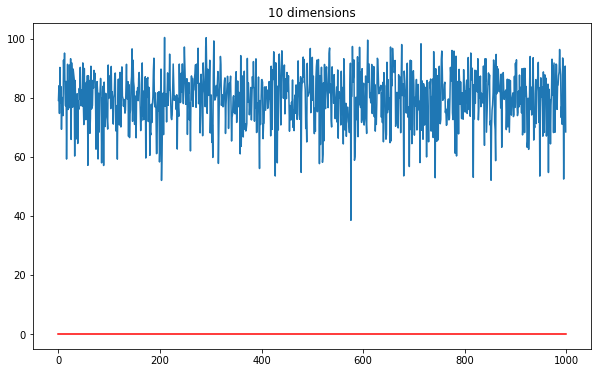


Best cost function: 38.48503 at iter: 576


In [20]:
test(rastrigin, [10], (-5.12, 5.12), 'lambda', 'random', 0)

#### ES(mu + lambda) with random parent selection

100%|██████████| 1000/1000 [01:27<00:00, 11.46it/s]


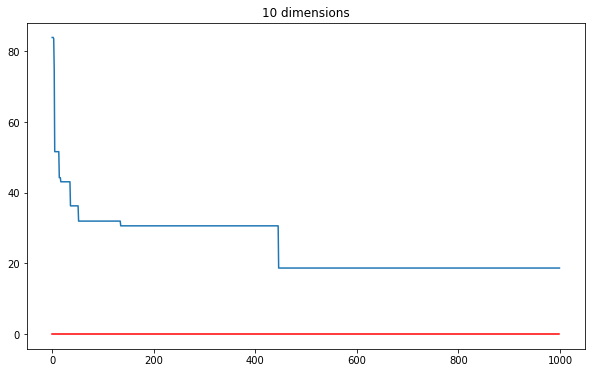

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 18.66603 at iter: 446


100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]


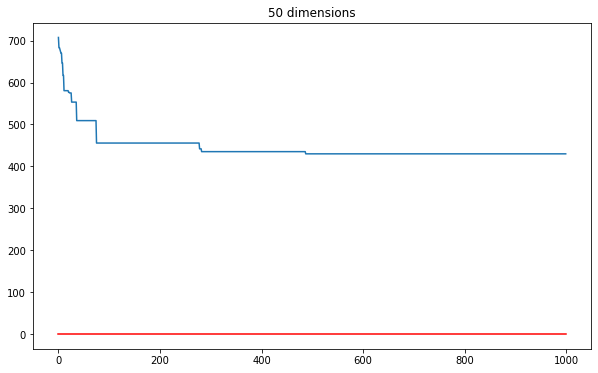

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 429.84122 at iter: 487


100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s]


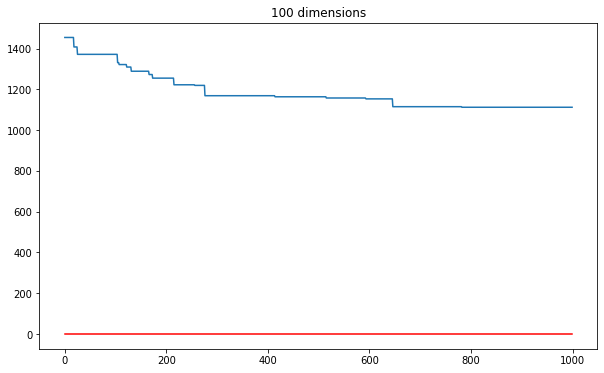

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1112.21813 at iter: 782


100%|██████████| 1000/1000 [04:59<00:00,  3.34it/s]


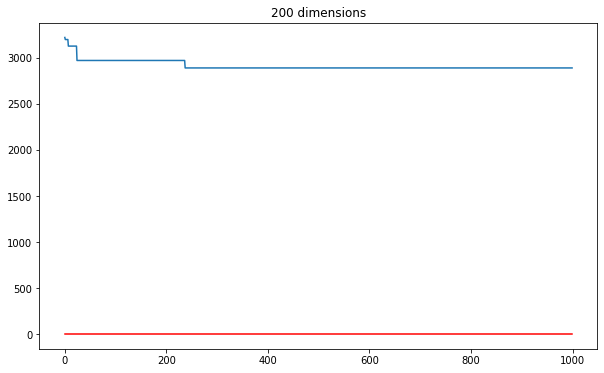


Best cost function: 2891.02357 at iter: 237


In [21]:
test(rastrigin, dims, (-5.12, 5.12), 'mulambda', 'random', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:41<00:00,  9.85it/s]


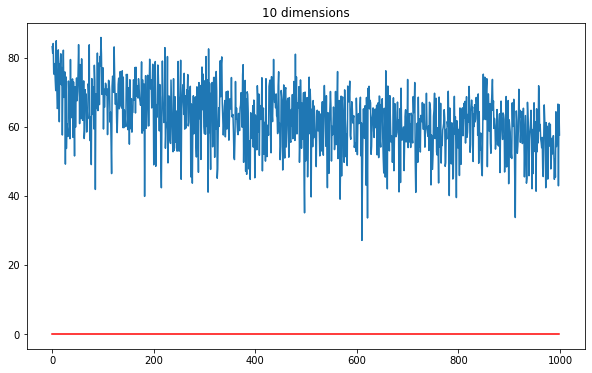

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 27.10763 at iter: 610


100%|██████████| 1000/1000 [03:46<00:00,  4.41it/s]


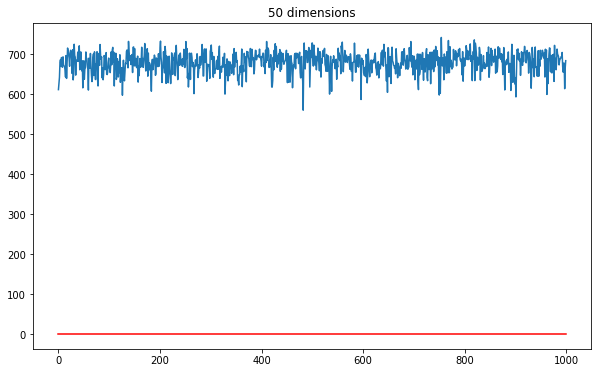

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 559.92157 at iter: 482


100%|██████████| 1000/1000 [04:12<00:00,  3.96it/s]


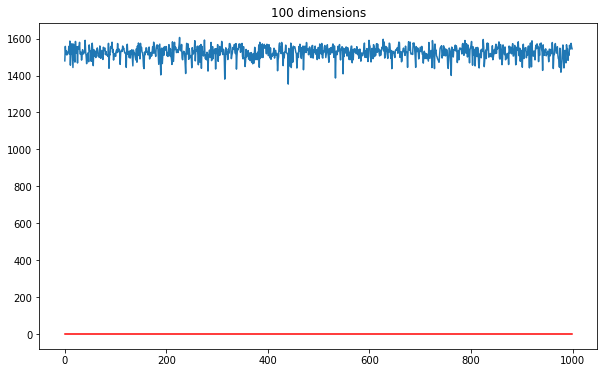

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1353.88749 at iter: 440


100%|██████████| 1000/1000 [04:56<00:00,  3.38it/s]


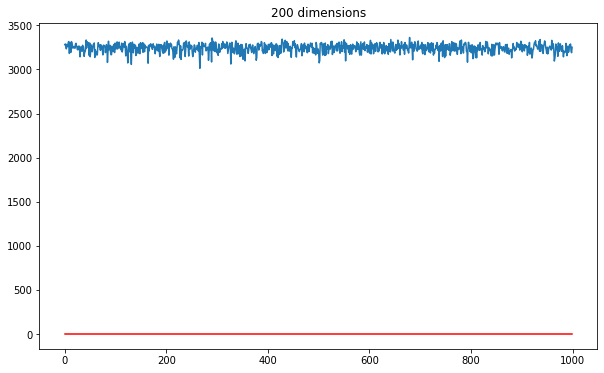


Best cost function: 3013.06425 at iter: 266


In [22]:
test(rastrigin, dims, (-5.12, 5.12), 'lambda', 'roulette', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:33<00:00, 10.66it/s]


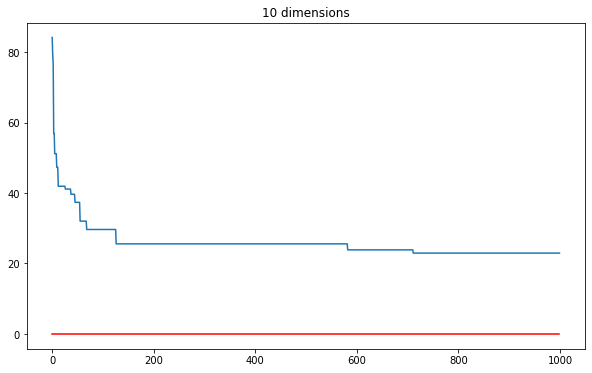

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 22.94847 at iter: 711


100%|██████████| 1000/1000 [02:11<00:00,  7.60it/s]


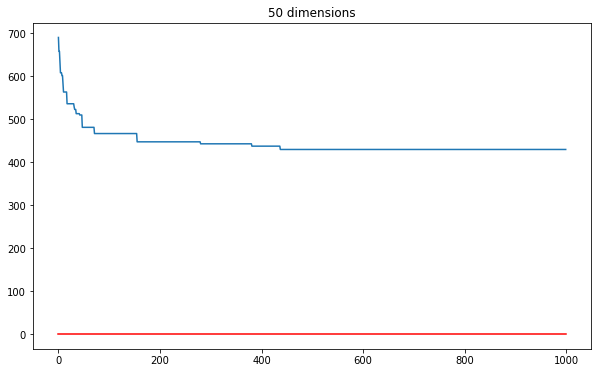

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 429.574 at iter: 437


100%|██████████| 1000/1000 [03:41<00:00,  4.51it/s]


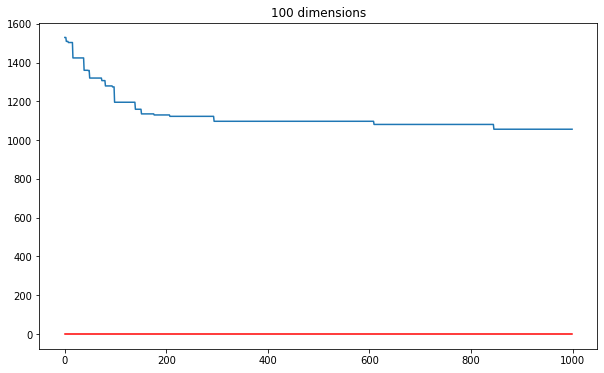

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1056.1448 at iter: 845


100%|██████████| 1000/1000 [04:34<00:00,  3.64it/s]


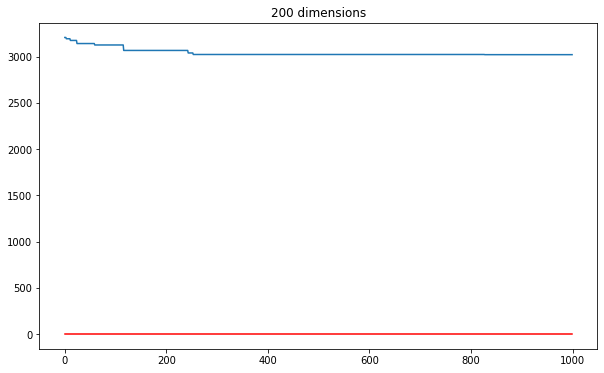


Best cost function: 3021.0722 at iter: 827


In [23]:
test(rastrigin, dims, (-5.12, 5.12), 'mulambda', 'roulette', 0)

### Griewank Function
##### $f(x) = 1 + \frac{1}{4000}\sum_{i=1}^Nx_i^2 - \prod_{i=1}^N\cos(\frac{x_i}{\sqrt i})$

In [24]:
def griewank(population):
    dims = population.shape[-1]
    return 1 + 1/4000*np.array([(x**2).sum() for x in population[:,0]]) -\
        np.prod([np.cos(x / np.sqrt(np.arange(1, dims+1))) for x in population[:,0]])

#### ES(mu, lambda) with random parent selection

100%|██████████| 1000/1000 [01:21<00:00, 12.26it/s]


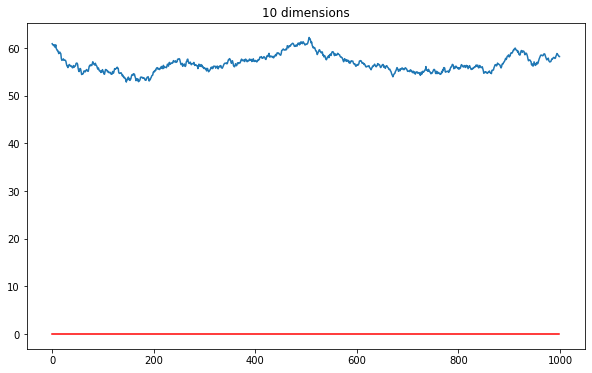


Best cost function: 52.84566 at iter: 146


In [25]:
test(griewank, [10], (-600, 600), 'lambda', 'random', 0)

#### ES(mu + lambda) with random parent selection

100%|██████████| 1000/1000 [01:21<00:00, 12.24it/s]


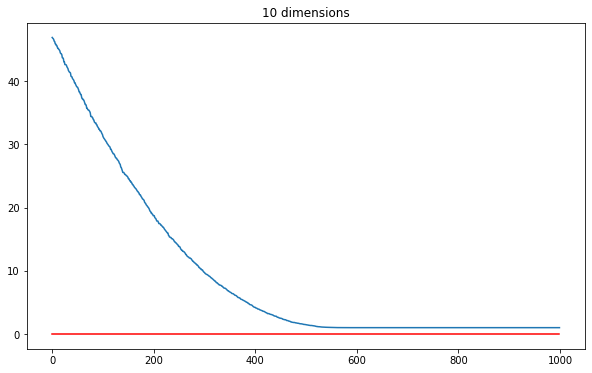

  0%|          | 1/1000 [00:00<03:11,  5.23it/s]


Best cost function: 1.0001 at iter: 981


100%|██████████| 1000/1000 [01:23<00:00, 11.93it/s]


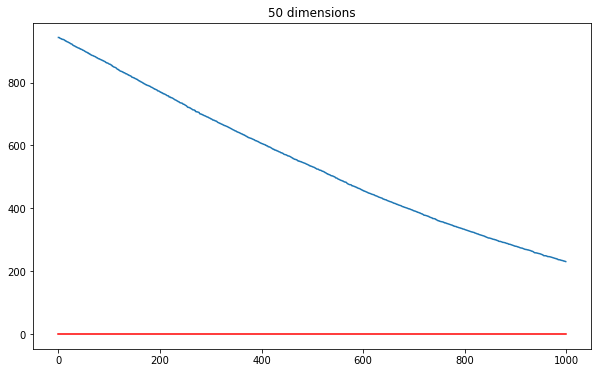

  0%|          | 1/1000 [00:00<02:14,  7.40it/s]


Best cost function: 230.49204 at iter: 999


100%|██████████| 1000/1000 [01:27<00:00, 11.37it/s]


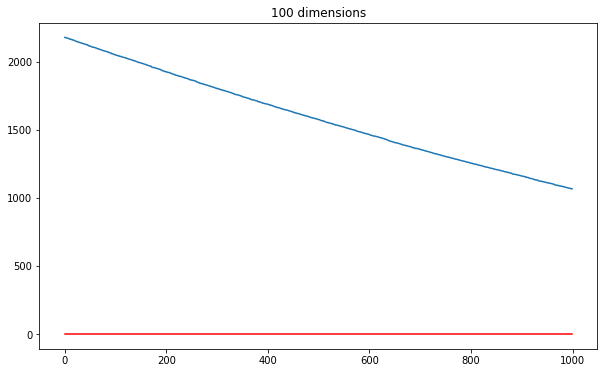

  0%|          | 1/1000 [00:00<02:38,  6.30it/s]


Best cost function: 1066.47481 at iter: 999


100%|██████████| 1000/1000 [01:44<00:00,  9.58it/s]


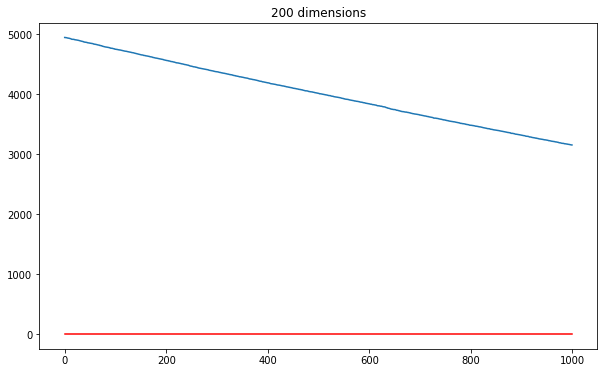


Best cost function: 3153.06717 at iter: 999


In [26]:
test(griewank, dims, (-600, 600), 'mulambda', 'random', 0)

#### ES(mu, lambda) with roulette method

100%|██████████| 1000/1000 [01:13<00:00, 13.53it/s]


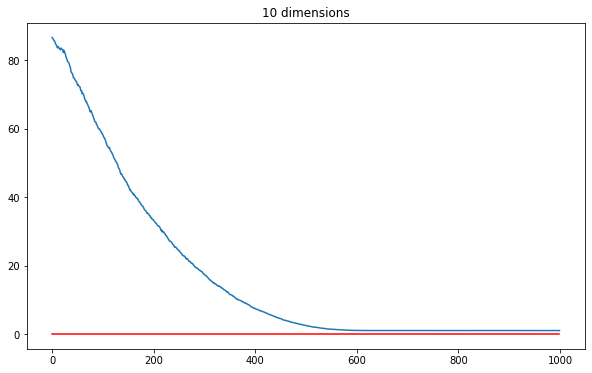

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1.00088 at iter: 905


100%|██████████| 1000/1000 [01:24<00:00, 11.79it/s]


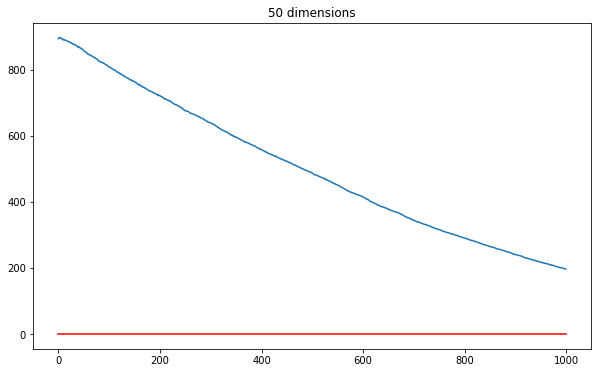

  0%|          | 1/1000 [00:00<02:05,  7.95it/s]


Best cost function: 196.45763 at iter: 999


100%|██████████| 1000/1000 [01:23<00:00, 12.04it/s]


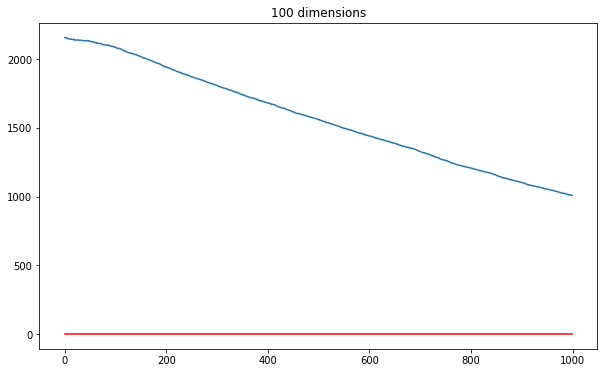

  0%|          | 0/1000 [00:00<?, ?it/s]


Best cost function: 1008.28983 at iter: 999


100%|██████████| 1000/1000 [01:44<00:00,  9.54it/s]


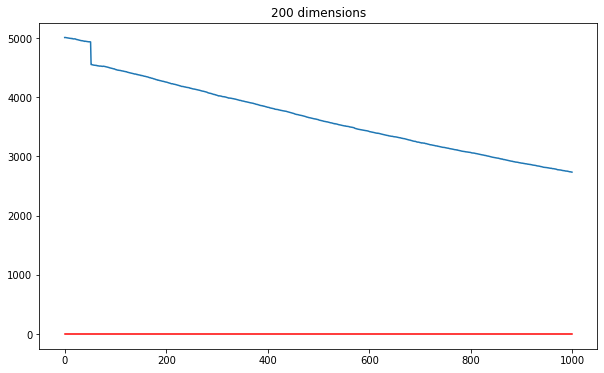


Best cost function: 2734.84764 at iter: 999


In [27]:
test(griewank, dims, (-600, 600), 'lambda', 'roulette', 0)

#### ES(mu + lambda) with roulette method

100%|██████████| 5000/5000 [06:19<00:00, 13.17it/s]


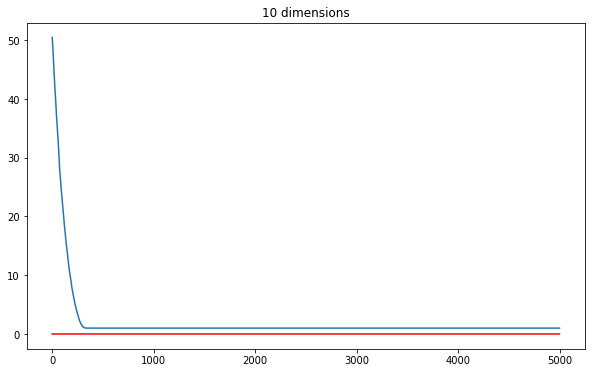

  0%|          | 1/5000 [00:00<10:09,  8.21it/s]


Best cost function: 1.00008 at iter: 701


100%|██████████| 5000/5000 [06:43<00:00, 12.40it/s]


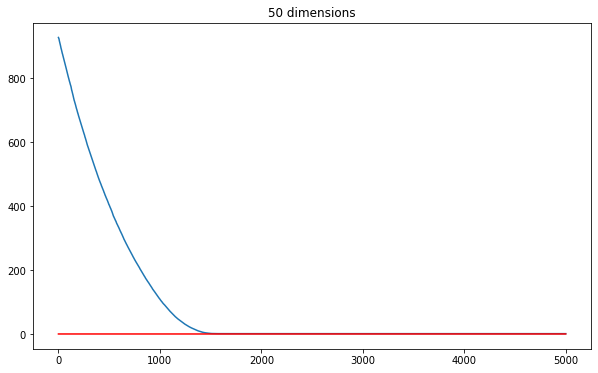

  0%|          | 1/5000 [00:00<12:06,  6.88it/s]


Best cost function: 1.0109 at iter: 4809


100%|██████████| 5000/5000 [06:43<00:00, 12.39it/s]


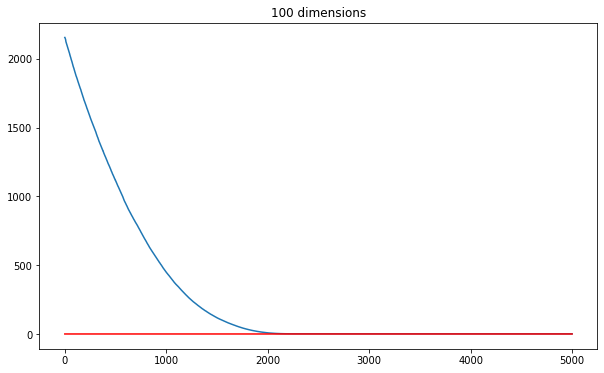

  0%|          | 0/5000 [00:00<?, ?it/s]


Best cost function: 1.05534 at iter: 4173


100%|██████████| 5000/5000 [07:55<00:00, 10.52it/s]


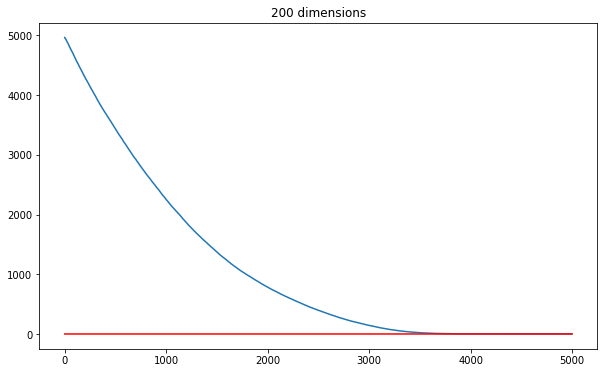


Best cost function: 1.34281 at iter: 4914


In [30]:
test(griewank, dims, (-600, 600), 'mulambda', 'roulette', 0, max_iters=5000)